## Building Random Quantum Circuits, with and without Noise, to Analyse Measurement Outcome Fidelity

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

**1) Configure Qiskit Runtime Service**

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from config import api_key


# Save an IBM Quantum account and set it as your default account.

QiskitRuntimeService.save_account(
    channel="ibm_quantum", token=api_key, set_as_default=True, overwrite=True
)

# Load saved credentials

service = QiskitRuntimeService()

**2) Generate a Random Circuit for Given Parameters**
- Args:
    * num_q - number of qubits
    * depth - depth of qauntum circuit
    * gate_set - dictionary of specified set of gates (defined in random_circuit.py module)

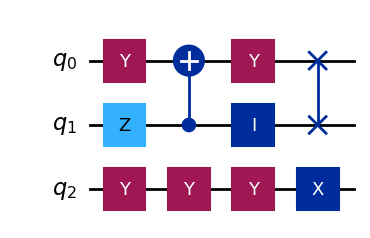

In [2]:
from random_circuit import eagle_gate_set, basis_gate_set
from random_circuit import get_random_circuit

## Main Function -- 1) Calling Random Circuit Generator
num_q = 3
depth = 4
gate_set = basis_gate_set

circuit = get_random_circuit(num_q, depth, gate_set)
circuit.draw("mpl")

**3) Add an arbitrary Noise to the random circuit at an arbitrary position**
- Args:
    * qubit - list of qubits to which the noise is applied
    * pos - the position (in terms of depth) at which noise is added
    * gate - noise gate to be added

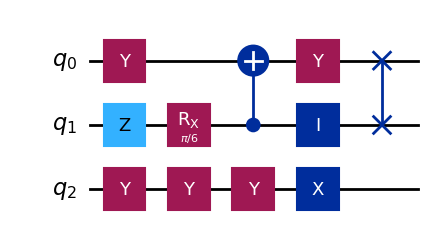

In [3]:
from qiskit.circuit.library import standard_gates
from utils import modify_circuit
import numpy as np


## Main Function -- 2) New circuit with Noise added
qubit = [1]
pos = 2
gate = standard_gates.RXGate(np.pi / 6)

noisyCirc = modify_circuit(qubit, gate, pos, circuit)
noisyCirc.draw("mpl")

**4) Performing measurements on the two Circuits (with and without noise)**
<br>
Measuring the qubits randomly in {X,Y,Z} basis for 'n' number of runs - **Shadow tomography**
- Args:
    * runs - number of measurements to be performed
    * num_q - number of qubits in the circuit
    * backend - Qiskit backend on which jobs will run
- Returns:
    * meas1 - measurement output of random circuit for 'n' runs
    * meas2 - measurement output of same circuit for 'n' runs
    * noiseMeas - measurement output of noisy circuit for 'n' runs

In [4]:
from qiskit.providers.basic_provider import BasicSimulator
from measure_circuit import get_random_basis_list, get_meas_output

## Main Function -- 3) Performing Measurements
runs = 10
backend = BasicSimulator()
# backend = service.backend("ibmq_qasm_simulator")
basis_list = get_random_basis_list(runs, num_q)
print("Measurement basis:\n" + str(basis_list))

meas1 = get_meas_output(circuit, backend, basis_list)
meas2 = get_meas_output(circuit, backend, basis_list)
noiseMeas = get_meas_output(noisyCirc, backend, basis_list)

print("\nFirst 5 measurement outcomes for the random circuit:")
for i in range(0, 5):
    print(meas1[i])

print("\nFirst 5 measurement outcomes for the circuit WITH noise:")
for i in range(0, 5):
    print(noiseMeas[i])

Measurement basis:
['YYY', 'ZXX', 'ZXX', 'ZZX', 'XZZ', 'ZYY', 'XYX', 'ZYZ', 'ZXY', 'ZZY']

First 5 measurement outcomes for the random circuit:
['YYY', {'100': 144, '001': 133, '110': 131, '010': 100, '000': 123, '101': 133, '111': 122, '011': 138}]
['ZXX', {'110': 269, '010': 235, '100': 249, '000': 271}]
['ZXX', {'010': 231, '000': 265, '110': 260, '100': 268}]
['ZZX', {'100': 518, '000': 506}]
['XZZ', {'001': 521, '000': 503}]

First 5 measurement outcomes for the circuit WITH noise:
['YYY', {'101': 115, '010': 126, '111': 129, '001': 138, '110': 124, '100': 138, '011': 121, '000': 133}]
['ZXX', {'000': 236, '110': 231, '100': 225, '011': 14, '001': 13, '010': 264, '101': 17, '111': 24}]
['ZXX', {'110': 248, '010': 246, '000': 227, '100': 229, '001': 17, '011': 23, '101': 17, '111': 17}]
['ZZX', {'000': 491, '100': 457, '111': 39, '011': 37}]
['XZZ', {'000': 455, '001': 495, '011': 39, '010': 35}]


**5) Compute and Plot Fidelities**
- Fidelities are computed for the circuit compared to itself and the noisy circuit.
- The plot is given for cumulative fidelities with increasing number of runs.

Circuit fidelities - [0.9995018180306139]
Noisy circuit - [0.9968655060431991]


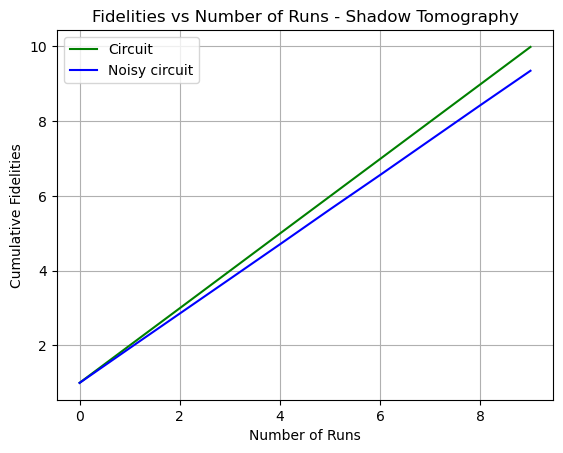

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_fidelity_data

## Main Function cntd -- 4) Computing Fidelity between:
#   - circOp1 & circOp2
#   - circOp1 & noiseCircOutput

classicalF = get_fidelity_data(meas1, meas2, noiseMeas)
circF = classicalF.get("C2C")
noisyF = classicalF.get("C2N")
print("Circuit fidelities - " + str(circF[::10]))
print("Noisy circuit - " + str(noisyF[::10]))

# plotting fidelities vs number of runs
x = np.arange(0, len(circF))
plt.title("Fidelities vs Number of Runs - Shadow Tomography")
plt.xlabel("Number of Runs")
plt.ylabel("Cumulative Fidelities")
plt.plot(x, circF, color="green", label="Circuit")
plt.plot(x, noisyF, color="blue", label="Noisy circuit")
plt.grid()
plt.legend()
plt.show()

**6) Fidelities for Measurement Performed on Classical Basis**
<br/>
The same circuits are measured in classical basis, the fidelities are computed and the plot is obtained for a comparison with plot above.

Measurement basis:
['XXX', 'YYY', 'ZZZ', 'XXX', 'YYY', 'ZZZ', 'XXX', 'YYY', 'ZZZ', 'XXX']
First 5 measurement outcomes for the random circuit:
['XXX', {'111': 141, '011': 130, '000': 128, '001': 132, '101': 126, '100': 114, '110': 147, '010': 106}]
['YYY', {'111': 147, '100': 128, '000': 121, '001': 116, '011': 133, '101': 129, '010': 129, '110': 121}]
['ZZZ', {'000': 1024}]
['XXX', {'001': 140, '000': 116, '100': 126, '111': 129, '101': 118, '010': 142, '110': 127, '011': 126}]
['YYY', {'001': 135, '010': 130, '100': 144, '000': 123, '101': 103, '111': 116, '011': 136, '110': 137}]

First 5 measurement outcomes for the circuit WITH noise:
['XXX', {'010': 130, '101': 125, '000': 107, '110': 148, '011': 138, '111': 142, '100': 122, '001': 112}]
['YYY', {'100': 131, '011': 147, '001': 136, '110': 124, '101': 128, '010': 128, '111': 111, '000': 119}]
['ZZZ', {'000': 964, '011': 60}]
['XXX', {'110': 131, '010': 129, '100': 136, '101': 139, '000': 123, '001': 121, '011': 110, '111': 135}]
[

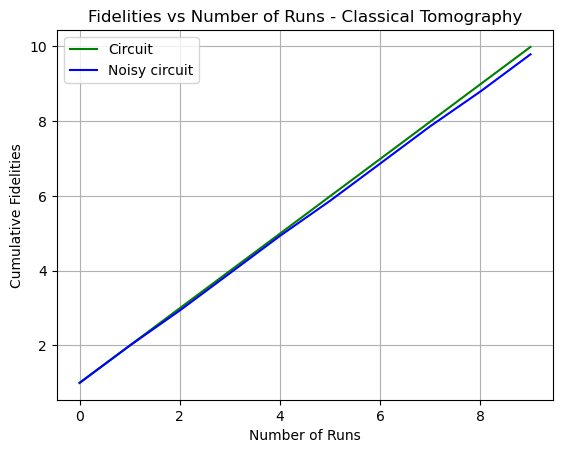

In [6]:
from qiskit.providers.basic_provider import BasicSimulator
from measure_circuit import get_meas_output, get_standard_basis_list
import numpy as np
import matplotlib.pyplot as plt
from utils import get_fidelity_data

## Main Function -- 5) Classical Tomography
classical_basis = get_standard_basis_list(runs, num_q)
print("Measurement basis:\n" + str(classical_basis))

meas1 = get_meas_output(circuit, backend, classical_basis)
meas2 = get_meas_output(circuit, backend, classical_basis)
noiseMeas = get_meas_output(noisyCirc, backend, classical_basis)

print("First 5 measurement outcomes for the random circuit:")
for i in range(0, 5):
    print(meas1[i])

print("\nFirst 5 measurement outcomes for the circuit WITH noise:")
for i in range(0, 5):
    print(noiseMeas[i])

classicalF = get_fidelity_data(meas1, meas2, noiseMeas)
circF = classicalF.get("C2C")
noisyF = classicalF.get("C2N")
print("\nCircuit fidelities - " + str(circF[::20]))
print("Noisy circuit - " + str(noisyF[::20]))

# plotting fidelities vs number of runs
x = np.arange(0, len(circF))
plt.title("Fidelities vs Number of Runs - Classical Tomography")
plt.xlabel("Number of Runs")
plt.ylabel("Cumulative Fidelities")
plt.plot(x, circF, color="green", label="Circuit")
plt.plot(x, noisyF, color="blue", label="Noisy circuit")
plt.grid()
plt.legend()
plt.show()